In [3]:

import numpy as np
import matplotlib.pyplot as plt
# import h5py as h5
# import time
import sys
# import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('../../Scripts')
import string

# import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
from PostProcessingScripts import * 


import pandas as pd 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [37]:




def plotFormationChannelsPerMetallicitySingleFiducial(axe=[], metallicities=[0.001, 0.33], formationRates=[0,0], colorlist=['k'], totalcolor='k', BPSmodelname='A',Ylim=3.85, DCOtype='BBH'):
    
    solar=0.0142
    # start building from 0
    upperY = np.zeros_like(formationRates[0])
    lowerY = np.zeros_like(formationRates[0])
    
    # go over rates of channels
    total = 0 
    for ind_c, c_rate in enumerate(formationRates):
        total += c_rate 
    
    total_sum = np.sum(total)
    channellist = ['(I)', '(II)', '(III)', '(IV)', '(V)']
    
    for ind_c, c_rate in enumerate(formationRates):
        
        # add this rate, 
        upperY += c_rate
        percentage = (np.sum(c_rate) / total_sum)*100.

        percentage_str =  r'$\textbf{%s}$'%channellist[ind_c]
        
        axe.fill_between(metallicities, lowerY*1e5, upperY*1e5, facecolor=colorlist[ind_c], \
                  lw=3, alpha=1, label=percentage_str)
        lowerY += c_rate
    
    axe.plot(metallicities,  np.asarray(upperY)*1e5, c=totalcolor,lw=3, alpha=1,  linestyle='-', zorder=100)    
    axe.scatter(metallicities, np.asarray(upperY)*1e5, color=totalcolor, s=40, alpha=1,  zorder=1000)    

    


    # plot Z values for some fixed metallicities
    text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                 r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                 r'$Z_{\rm{i}}=0.001$']#, r'$Z_{\rm{i}}=0.0105$']    
    for zz_ind, zz in enumerate([np.log10(solar),  np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001)]):
                                
        axe.plot([zz,zz], [0,Ylim+1],  c='k',lw=1.2, alpha=1, linestyle=':', zorder=100)
        axe.text(zz-0.06, Ylim-0.01, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')    
        
    # location of the small legends is on the left, unless it does not fit:
    if DCOtype=='BBH':
        x_box, y_box = 0.63, .4
    elif (DCOtype=='BNS') and (BPSmodelname=='G'):
        x_box, y_box = 0.63, .4
    else:
        x_box, y_box = 0.02, .55
        
    axe.legend(fontsize=18,  ncol=2, \
               bbox_to_anchor=(x_box, y_box),loc="lower left", borderaxespad=0., frameon=False).set_zorder(10000)

    
    axe.set_xlim(min(metallicities), max(metallicities))
    axe.set_ylim(0,Ylim)
        
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
    axe.annotate(r'\textbf{model %s:}'%(BPSmodelname) +'\n' + alphabetPhysicalNameDict[BPSmodelname], xy=(0.042, .95), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props)

    
    return axe
    
    

In [38]:

def plotGridFormationRatePerMetallicityFiducial(DCOtype = 'BBH', Ylim = 10):


    nModels=15

    solar=0.0142


    channel_names = ['I_classic', 'II_only_stable_MT', 'III_single_core_CE', 'IV_double_core_CE', 'V_other']
    colorlist = [ '#118AB2', '#EF476F', '#FFD166', '#073B4C', 'gray']

    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]



    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}
    print('doing DCO type  ', DCOtype)
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]  
    DCOname = dictDCOtypeDCOlabel[DCOtype]
    log10metallicities= np.log10(np.asarray(metallicities))



    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)}) 



    
    for ind_m, bps_model in enumerate(BPSnameslist[0]):
        print('now at model ', alphabetDirDict[bps_model])


        # hack to obtain the axis row and column index 
        ii = int(ind_m/ncols)%nrows
        jj = ind_m%ncols
    #     print(ii,jj)    

        formationRates = []
        
        # for me the CSV file with the BHNS rates is in the directory called 'CSVsummaryFiles'
        df = pd.read_csv('CSVsummaryFiles/formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        for ind_c, c_ in enumerate(channel_names):

            key_ = bps_model + ' ' + c_ + '  [Msun^{-1}]'

            # rate of this channel: 
            c_rate = df[key_]


            formationRates.append(c_rate)


        # plot for this sub panel & sub model the formation rate per metallicity 
        axe = plotFormationChannelsPerMetallicitySingleFiducial(axe=axe,\
                                                             metallicities=log10metallicities,\
                                                             formationRates=formationRates, \
                                                               colorlist=colorlist, BPSmodelname=bps_model, Ylim=Ylim, DCOtype=DCOtype)
    

        if (jj!=0):
            axe[ii,jj].set_yticks([])



    # fontsize of x and y labels
    xlabel = r'$\log_{10}(Z_{\rm{i}})$'
    ylabel = r'${\rm{d}} N_{\rm{form}} / \rm{d}M_{\rm{SFR}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs+4)



    plt.tight_layout() 
    plt.subplots_adjust(wspace=0., hspace=0.)
    plt.savefig('./FormationRatePerMetallicityFiducial'+ DCOname +'.png')
    plt.savefig('./FormationRatePerMetallicityFiducial'+ DCOname +'.pdf')
    plt.show()
    plt.close()
    

doing DCO type   BHNS
now at model  fiducial


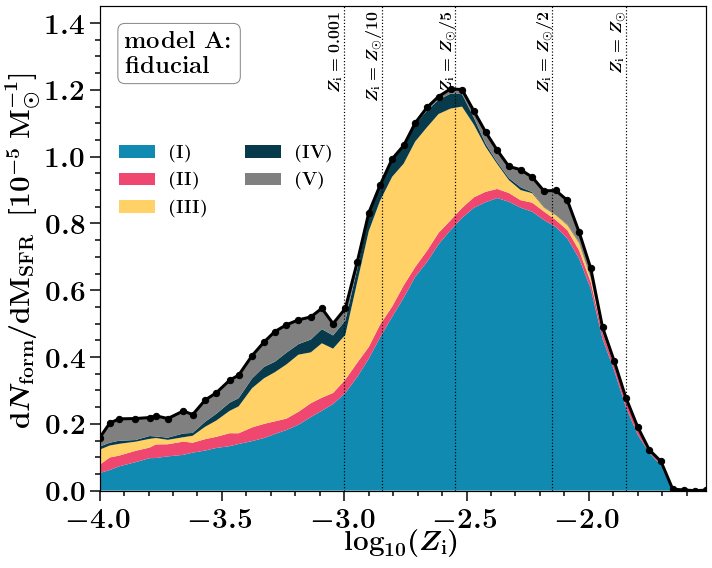

In [39]:
plotGridFormationRatePerMetallicityFiducial(DCOtype = 'BHNS',Ylim = 1.45)